# Autores

- Caroline Nunes Araujo ([@Carol-Nunes](https://github.com/Carol-Nunes))
- Gabriel Ciriaco de Carvalho ([@Gabriel-Ciriaco](https://github.com/Gabriel-Ciriaco))

# Importando bibliotecas

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sorting_algorithms import Sorting_Algorithms

In [36]:
df = pd.read_csv("./testes_ordenacao.csv")
df

,Algoritmo,ID_VETOR,NumeroEntradas,Tempo,TipoEntrada
0,BubbleSort,1,1,0.000004,Aleatória
1,BubbleSort,1,2,0.000002,Aleatória
2,BubbleSort,1,3,0.000002,Aleatória
3,BubbleSort,1,4,0.000001,Aleatória
4,BubbleSort,1,6,0.000002,Aleatória
...,...,...,...,...,...
30155,BubbleSort,20,96304,3.630569,Decrescente
30156,BubbleSort,20,115609,5.274377,Decrescente
30157,BubbleSort,20,138784,7.600984,Decrescente
30158,BubbleSort,20,166604,10.841310,Decrescente


# Testando os Algoritmos

## Criar Sequência Númerica

In [ ]:
import math


def gerar_tamanhos_entrada_log_exp(max_log=1000, max_exp=10**6, num_log=30, num_exp=30):
    """
    Gera uma sequência de tamanhos de entrada para análise de desempenho de algoritmos.

    A sequência tem duas partes:
    - Crescimento logarítmico (num_log pontos) entre 1 e max_log
    - Crescimento exponencial (num_exp pontos) entre max_log e max_exp

    Os tamanhos são salvos num arquivo binário "tamanhos_entrada_log_exp.bin".

    Parâmetros:
        max_log (int): limite superior da parte logarítmica
        max_exp (int): tamanho máximo (último valor será exatamente max_exp)
        num_log (int): número de pontos na faixa logarítmica
        num_exp (int): número de pontos na faixa exponencial
    """

    # --- Crescimento logarítmico ---
    log_values = []
    for i in range(num_log):
        # interpolação logarítmica de 1 até max_log
        val = round(math.exp(math.log(1) + (math.log(max_log) - math.log(1)) * i / (num_log - 1)))
        log_values.append(max(1, val))  # garante mínimo 1

    # --- Crescimento exponencial ---
    exp_values = []
    base = (max_exp / max_log) ** (1 / (num_exp - 1))
    for i in range(num_exp):
        val = round(max_log * (base ** i))
        exp_values.append(val)
    exp_values[-1] = max_exp  # garante o último valor exato

    # --- Combina e remove duplicatas ---
    return sorted(set(log_values + exp_values))

In [ ]:
sequencia = gerar_tamanhos_entrada_log_exp(max_log=1000,max_exp=2*(10**5), num_log=25, num_exp=30)
print(sequencia)

[1, 2, 3, 4, 6, 7, 10, 13, 18, 24, 32, 42, 56, 75, 100, 133, 178, 237, 316, 422, 562, 750, 1000, 1200, 1441, 1730, 2077, 2493, 2993, 3593, 4313, 5177, 6215, 7461, 8957, 10752, 12907, 15495, 18601, 22330, 26806, 32179, 38629, 46373, 55668, 66827, 80223, 96304, 115609, 138784, 166604, 200000]


## Carregando o Algoritmo

In [ ]:
import os


dir_dll_path = os.path.join(os.getcwd(), 'C_Algorithms_Library.so')
alg = Sorting_Algorithms(dir_dll_path)

### Algoritmos

In [ ]:
algoritmos = [
    ("HeapSort", alg.heap_sort),
    ("MergeSort", alg.merge_sort),
    ("QuickSort", alg.quick_sort),
    ("CentralQuickSort", alg.central_quick_sort),
    ("InsertionSort", alg.insertion_sort),
    ("SelectionSort", alg.selection_sort),
    ("ShellSort", alg.shell_sort),
    ("BetterBubbleSort", alg.better_bubble_sort),
    ("BubbleSort", alg.bubble_sort),
]

## Gerando os vetores de entrada

### Entrada Aleatória

In [ ]:
tipo_entrada = "Aleatória"

In [ ]:
n_vetores = 20
qtd_elementos = 200_000

array_random = np.random.randint(1, qtd_elementos, size=(n_vetores, qtd_elementos), dtype=np.int32)

array_random

array([[189896,  32851, 136723, ...,  80044, 173899, 108172],
       [ 89046, 193965,  64818, ..., 161883, 107509,  38958],
       [122925,  59615,  44435, ...,  79066,  59982,  43958],
       ...,
       [ 99123, 121621,   4742, ...,  39955, 160092,  24390],
       [ 11828, 128433, 132427, ...,  86907,   7922, 191783],
       [ 94607,  85932, 115805, ...,  96991, 160052,  76247]], dtype=int32)

#### Rodando os algoritmos

In [ ]:
novos_tempos = []

for nome_algoritmo, algoritmo_ordenacao in algoritmos:
    for i, array in enumerate(array_random):
        for j, seq_value in enumerate(sequencia):
            copia = array[:seq_value].copy()

            tempo_demorado = alg.run_sort_function(copia, sort_algorithm=algoritmo_ordenacao)

            nova_iteracao = {
                                "Algoritmo": f"{nome_algoritmo}",
                                "ID_VETOR": i + 1,
                                "NumeroEntradas": seq_value,
                                "Tempo": tempo_demorado,
                                "TipoEntrada": tipo_entrada
                            }

            novos_tempos.append(nova_iteracao)

            print(nova_iteracao)

### Entrada Crescente

In [ ]:
tipo_entrada = "Crescente"
QTD_TESTES = 20 # Quantidade de execuções de ordenação no mesmo algoritmo

In [ ]:
arr_crescente = np.arange(1, 200001, dtype=np.int32)

arr_crescente

#### Rodando os algoritmos

In [ ]:
novos_tempos = []

for nome_algoritmo, algoritmo_ordenacao in algoritmos:
    for i in range(QTD_TESTES):
        for j, seq_value in enumerate(sequencia):
            copia = arr_crescente[:seq_value].copy()

            tempo_demorado = alg.run_sort_function(copia, sort_algorithm=algoritmo_ordenacao)

            nova_iteracao = {
                                "Algoritmo": f"{nome_algoritmo}",
                                "ID_VETOR": i + 1,
                                "NumeroEntradas": seq_value,
                                "Tempo": tempo_demorado,
                                "TipoEntrada": tipo_entrada
                            }

            novos_tempos.append(nova_iteracao)

            print(nova_iteracao)

### Entrada Decrescente

In [ ]:
tipo_entrada = "Decrescente"
QTD_TESTES = 20 # Quantidade de execuções de ordenação no mesmo algoritmo

In [ ]:
arr_decrescente = np.arange(start=200000, stop=0, step=-1, dtype=np.int32)

arr_decrescente

array([200000, 199999, 199998, ...,      3,      2,      1],
      shape=(200000,), dtype=int32)

#### Rodando os algoritmos

In [ ]:
novos_tempos = []

for nome_algoritmo, algoritmo_ordenacao in algoritmos:
    for i in range(QTD_TESTES):
        for j, seq_value in enumerate(sequencia):
            copia = arr_decrescente[:seq_value].copy()

            tempo_demorado = alg.run_sort_function(copia, sort_algorithm=algoritmo_ordenacao)

            nova_iteracao = {
                                "Algoritmo": f"{nome_algoritmo}",
                                "ID_VETOR": i + 1,
                                "NumeroEntradas": seq_value,
                                "Tempo": tempo_demorado,
                                "TipoEntrada": tipo_entrada
                            }

            novos_tempos.append(nova_iteracao)

            print(nova_iteracao)

{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 1, 'Tempo': 3e-06, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 2, 'Tempo': 5e-06, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 3, 'Tempo': 9e-07, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 4, 'Tempo': 1e-06, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 6, 'Tempo': 2.49e-05, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 7, 'Tempo': 1.3e-06, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 10, 'Tempo': 1.2e-06, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 13, 'Tempo': 1.2e-06, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 'HeapSort', 'ID_VETOR': 1, 'NumeroEntradas': 18, 'Tempo': 1.3e-06, 'TipoEntrada': 'Decrescente'}
{'Algoritmo': 

### Salvando os novos dados de ordenação

In [ ]:
novo_algoritmo = pd.DataFrame(novos_tempos)

df = pd.concat([df, novo_algoritmo], ignore_index=True)
df

,Algoritmo,ID_VETOR,NumeroEntradas,Tempo,TipoEntrada
0,BubbleSort,1,1,0.000004,Aleatória
1,BubbleSort,1,2,0.000002,Aleatória
2,BubbleSort,1,3,0.000002,Aleatória
3,BubbleSort,1,4,0.000001,Aleatória
4,BubbleSort,1,6,0.000002,Aleatória
...,...,...,...,...,...
30155,BubbleSort,20,96304,3.630569,Decrescente
30156,BubbleSort,20,115609,5.274377,Decrescente
30157,BubbleSort,20,138784,7.600984,Decrescente
30158,BubbleSort,20,166604,10.841310,Decrescente


# Gráficos

In [72]:
def label_grupo(nome_grupo: str):
    label = nome_grupo

    if nome_grupo == "QuickSort":
        label = "Quick Sort (Pivô Início)"
    elif nome_grupo == "CentralQuickSort":
        label = "Quick Sort (Pivô Central)"
    elif nome_grupo == "BetterBubbleSort":
        label = "Bubble Sort (Melhorado)"

    return label

## Entradas Aleatórias

In [81]:
# Cria uma nova coluna com o prefixo
df_grafico = df[df["TipoEntrada"] == "Aleatória"].copy()

df_grafico['Algoritmo'] = df['Algoritmo'].apply(label_grupo)

# Tempo em microsegundos
df_grafico['Tempo_us'] = df['Tempo'] * 1e6

# Calcula a média do tempo para cada grupo e número de entradas
df_stats = (
    df_grafico.groupby(['Algoritmo', 'NumeroEntradas'], as_index=False)['Tempo_us']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'TempoMedio', 'std': 'DesvioPadrao'})
)

# Plotando
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

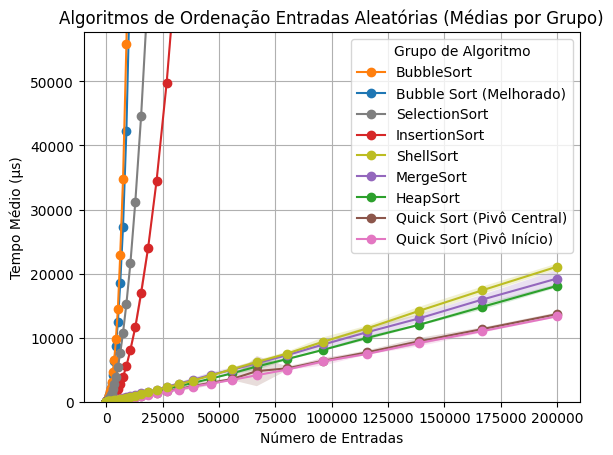

In [82]:
algoritmos = df_stats['Algoritmo'].unique()

for algoritmo in algoritmos:
    df_grupo = df_stats[df_stats['Algoritmo'] == algoritmo]
    plt.plot(df_grupo['NumeroEntradas'], df_grupo['TempoMedio'], '-o', label=algoritmo)
    plt.fill_between(
        df_grupo['NumeroEntradas'],
        df_grupo['TempoMedio'] - df_grupo['DesvioPadrao'],
        df_grupo['TempoMedio'] + df_grupo['DesvioPadrao'],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Aleatórias (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')


handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)

plt.legend(handles, labels, title='Grupo de Algoritmo')

limite_superior = (
    df_stats[df_stats['Algoritmo'].isin(['MergeSort', 'HeapSort','QuickSort', 'CentralQuickSort'])]
    ['TempoMedio'].max() * 3.0 # adiciona 300% de folga visual
    )

plt.ylim(0, limite_superior)
plt.grid(True)
plt.show()


### Algoritmos com desempenho mais lento para grandes entradas

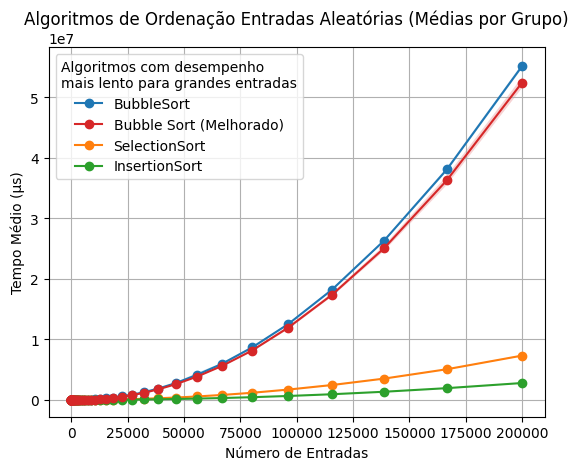

In [83]:
algoritmos = df_stats['Algoritmo'].unique()

algoritmos_quadraticos = df_grafico[df_grafico["Tempo"] > 0.25]["Algoritmo"].unique()

for algoritmo in algoritmos_quadraticos:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Aleatórias (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')

# Organização das legendas.
handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)
plt.legend(handles, labels, title="Algoritmos com desempenho\nmais lento para grandes entradas")

plt.grid(True)
plt.show()


### Algoritmos com desempenho mais rápido para grandes entradas

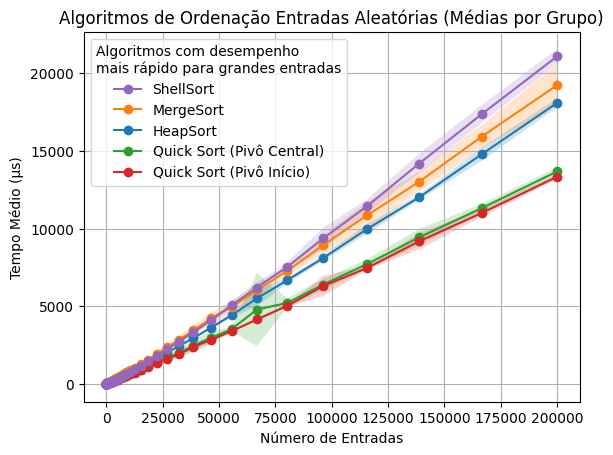

In [84]:
algoritmos = df_stats['Algoritmo'].unique()

algoritmos_lineares = [a for a in algoritmos if a not in algoritmos_quadraticos]

for algoritmo in algoritmos_lineares:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Aleatórias (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')

handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)

plt.legend(handles, labels, title="Algoritmos com desempenho\nmais rápido para grandes entradas")


plt.grid(True)
plt.show()


## Entradas Crescente

In [73]:
df_grafico = df[df['TipoEntrada'] == "Crescente"].copy()

df_grafico['Algoritmo'] = df_grafico['Algoritmo'].apply(label_grupo)

# Tempo em microsegundos
df_grafico['Tempo_us'] = df['Tempo'] * 1e6

df_stats = (
    df_grafico.groupby(['Algoritmo', 'NumeroEntradas'], as_index=False)['Tempo_us']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'TempoMedio', 'std': 'DesvioPadrao'})
)

plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

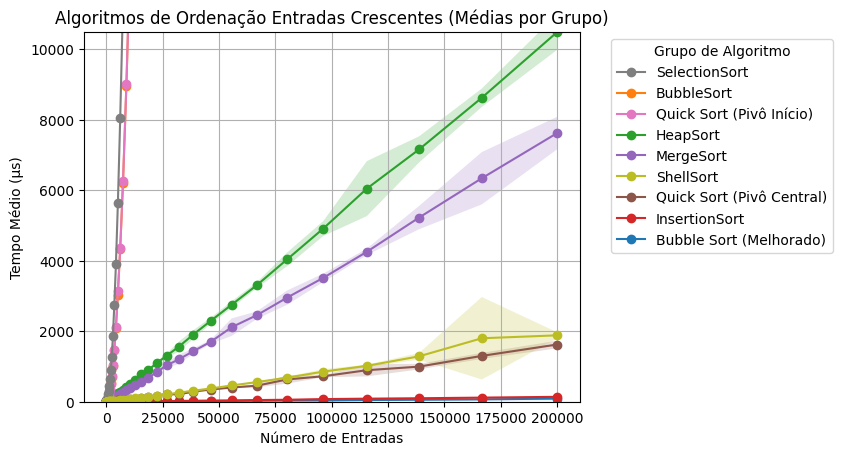

In [74]:
algoritmos = df_stats['Algoritmo'].unique()

for algoritmo in algoritmos:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Crescentes (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')


handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)

plt.legend(
        handles,
        labels,
        title='Grupo de Algoritmo',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

limite_superior = (
    df_stats[df_stats['Algoritmo'].isin(['InsertionSort', 'MergeSort','HeapSort'])]
    ['TempoMedio'].max() * 1.0 # adiciona 100% de folga visual
    )

plt.ylim(0, limite_superior)
plt.grid(True)
plt.show()


### Algoritmos com desempenho mais lento para grandes entradas

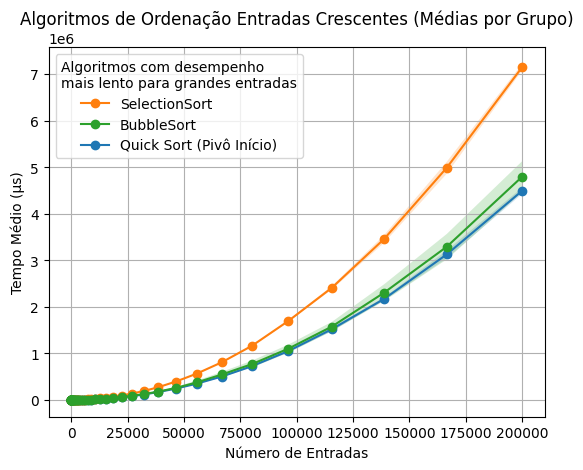

In [75]:
algoritmos = df_stats['Algoritmo'].unique()

algoritmos_quadraticos = df_grafico[df_grafico["Tempo"] > 4]["Algoritmo"].unique()

for algoritmo in algoritmos_quadraticos:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Crescentes (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')

handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)

plt.legend(handles, labels, title="Algoritmos com desempenho\nmais lento para grandes entradas")

plt.grid(True)
plt.show()


### Algoritmos com desempenho mais rápido para grandes entradas

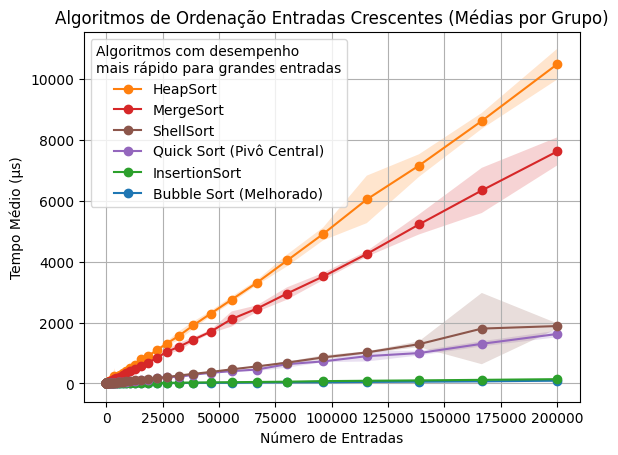

In [76]:
algoritmos = df_stats['Algoritmo'].unique()

algoritmos_lineares = [a for a in algoritmos if a not in algoritmos_quadraticos]

for algoritmo in algoritmos_lineares:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Crescentes (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')

handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)

plt.legend(handles, labels, title="Algoritmos com desempenho\nmais rápido para grandes entradas")


plt.grid(True)
plt.show()


## Entradas Decrescente

In [77]:
df_grafico = df[df['TipoEntrada'] == "Decrescente"].copy()

df_grafico['Algoritmo'] = df_grafico['Algoritmo'].apply(label_grupo)

# Tempo em microsegundos
df_grafico['Tempo_us'] = df['Tempo'] * 1e6

df_stats = (
    df_grafico.groupby(['Algoritmo', 'NumeroEntradas'], as_index=False)['Tempo_us']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'TempoMedio', 'std': 'DesvioPadrao'})
)

plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

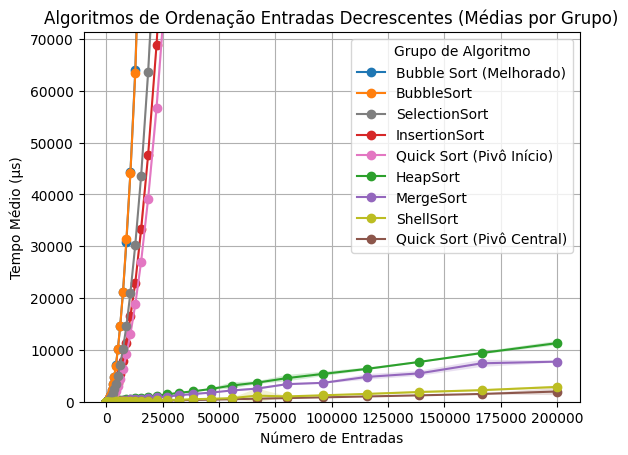

In [78]:
algoritmos = df_stats['Algoritmo'].unique()

for algoritmo in algoritmos:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Decrescentes (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')

handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)

plt.legend(handles, labels, title='Grupo de Algoritmo')

limite_superior = (
    df_stats[df_stats['Algoritmo'].isin(['QuickSort','ShellSort'])]
    ['TempoMedio'].max() * 25.0 # adiciona 100% de folga visual
    )

plt.ylim(0, limite_superior)
plt.grid(True)
plt.show()


### Algoritmos com desempenho mais lento para grandes entradas

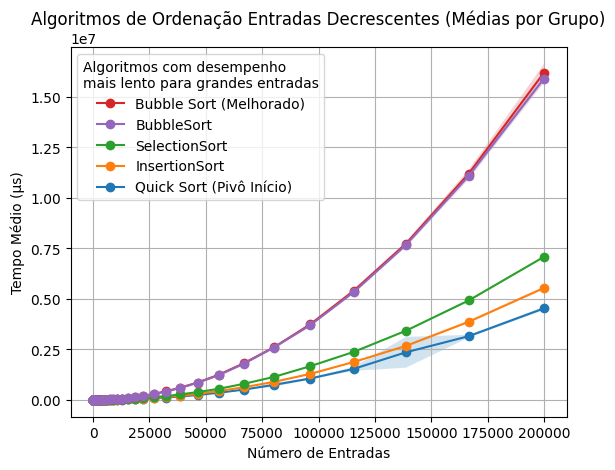

In [79]:
algoritmos = df_stats['Algoritmo'].unique()

algoritmos_quadraticos = df_grafico[df_grafico["Tempo"] > 0.25]["Algoritmo"].unique()

for algoritmo in algoritmos_quadraticos:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Decrescentes (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')

handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)

plt.legend(handles, labels, title="Algoritmos com desempenho\nmais lento para grandes entradas")

plt.grid(True)
plt.show()


### Algoritmos com desempenho mais rápido para grandes entradas

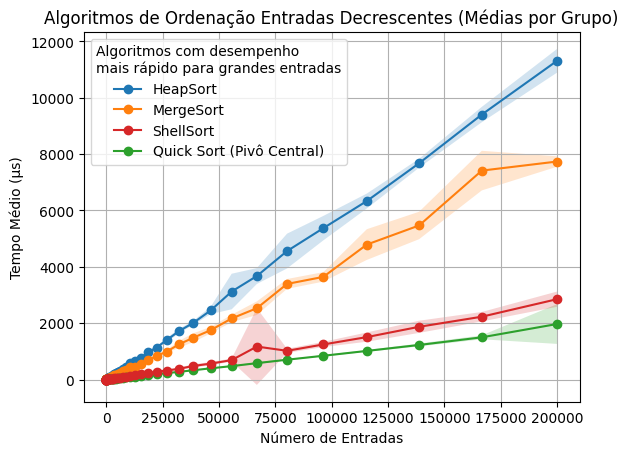

In [80]:
algoritmos = df_stats['Algoritmo'].unique()

algoritmos_lineares = [a for a in algoritmos if a not in algoritmos_quadraticos]

for algoritmo in algoritmos_lineares:
    df_algoritmo = df_stats[df_stats['Algoritmo'] == algoritmo]

    plt.plot(df_algoritmo["NumeroEntradas"], df_algoritmo["TempoMedio"], '-o', label=algoritmo)

    plt.fill_between(
        df_algoritmo["NumeroEntradas"],
        df_algoritmo["TempoMedio"] - df_algoritmo["DesvioPadrao"],
        df_algoritmo["TempoMedio"] + df_algoritmo["DesvioPadrao"],
        alpha=0.2
    )

plt.title('Algoritmos de Ordenação Entradas Decrescentes (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')

handles, labels = plt.gca().get_legend_handles_labels()

# Ordena as legendas pela posição Y final da linha (quem termina mais alto vem primeiro)
handles_labels_sorted = sorted(
    zip(handles, labels),
    key=lambda hl: hl[0].get_ydata()[-1],
    reverse=True  # de cima pra baixo
)

handles, labels = zip(*handles_labels_sorted)
plt.legend(handles,labels, title="Algoritmos com desempenho\nmais rápido para grandes entradas")


plt.grid(True)
plt.show()


# (Opcional) Salvar Dados

In [ ]:
path_csv_final = "./testes_ordenacao.csv"

df['Algoritmo'].unique(), df['TipoEntrada'].unique()

(array(['BubbleSort', 'MergeSort', 'QuickSort', 'HeapSort',
        'CentralQuickSort', 'SelectionSort', 'InsertionSort',
        'BetterBubbleSort', 'ShellSort'], dtype=object),
 array(['Aleatória', 'Crescente', 'Decrescente'], dtype=object))

In [ ]:
df.to_csv(path_csv_final, index=False)